In [46]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ks_2samp
from matplotlib.gridspec import GridSpec

## Generating a Normal Disribution 

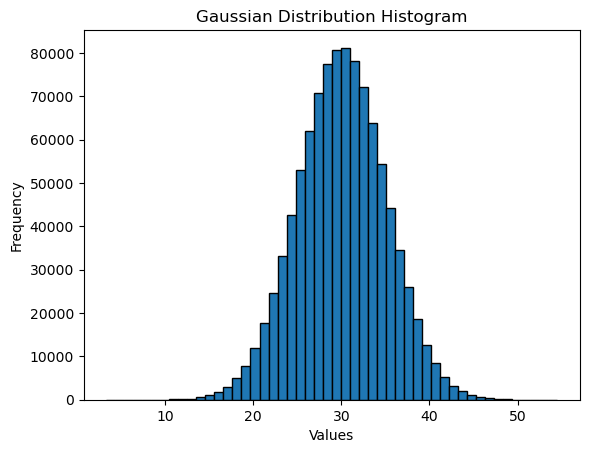

In [3]:
# Set the parameters for the Gaussian distribution
mean = 30
std_dev = 5


# Set the size of the distribution
size = 1000000


# Generate the Gaussian distribution
distribution = [random.gauss(mean, std_dev) for _ in range(size)]


# Plot the histogram
plt.hist(distribution, bins=50, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Gaussian Distribution Histogram')
plt.show()

## Drawing a Sample from the Population Distribution and Displaying its CDF Curve

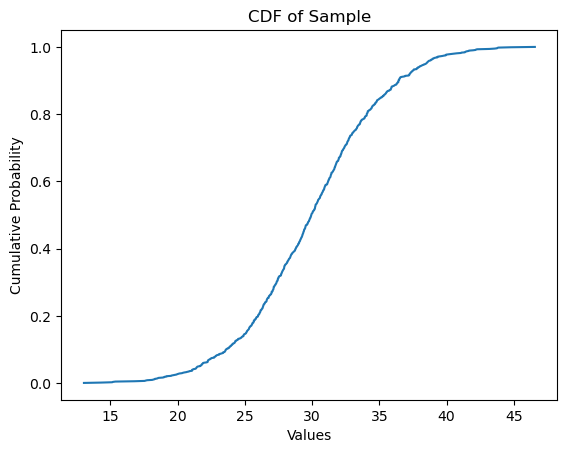

In [4]:
# Set the size of the sample
sample_size = 1000


# Draw a sample from the population
sample = random.sample(distribution, sample_size)


# Compute the CDF of the sample
sorted_sample = np.sort(sample)
cdf = np.arange(1, len(sorted_sample) + 1) / float(len(sorted_sample))


# Plot the CDF of the sample
plt.plot(sorted_sample, cdf)
plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Sample')
plt.show()

## CDF Curves of Multiple Samples Drawn from the Same Population  

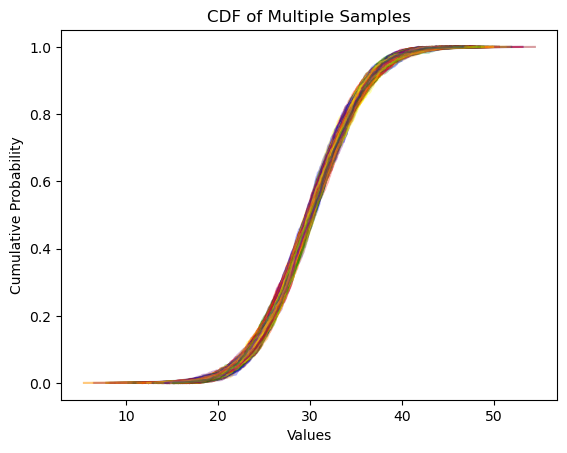

In [6]:
# Set the size of the sample
sample_size = 1000


# Set the number of repetitions
num_repetitions = 1000


# Plot each sample's CDF with a unique color
for _ in range(num_repetitions):
    # Draw a sample from the population
    sample = random.sample(distribution, sample_size)


    # Compute the CDF of the sample
    sorted_sample = np.sort(sample)
    cdf = np.arange(1, len(sorted_sample) + 1) / float(len(sorted_sample))


    # Generate a random color for each CDF
    color = random.choice(['red', 'blue', 'green', 'orange', 'purple', 'yellow'])


    # Plot the CDF of the sample with the assigned color
    plt.plot(sorted_sample, cdf, color=color, alpha=0.3)


plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Multiple Samples')
plt.show()

## CDF Curves of Two Samples Drawn from the Same Population

K-S statistic: 0.04817486644510355


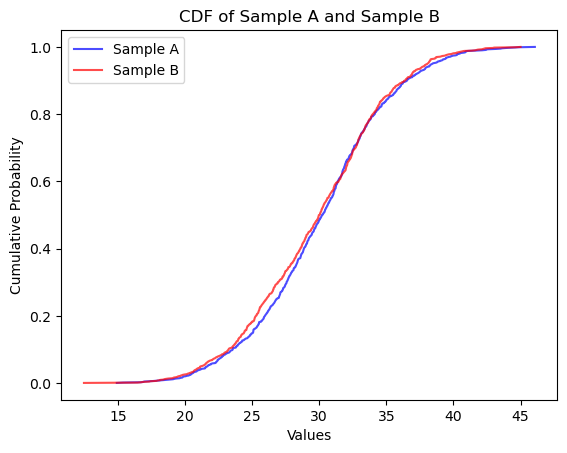

In [7]:
# Set the size of the sample
sample_size = 1000


# Draw two samples from the population
sample_a = random.sample(distribution, sample_size)
sample_b = random.sample(distribution, sample_size)


# Compute the CDF of sample_a
sorted_sample_a = np.sort(sample_a)
cdf_a = np.arange(1, len(sorted_sample_a) + 1) / float(len(sorted_sample_a))


# Compute the CDF of sample_b
sorted_sample_b = np.sort(sample_b)
cdf_b = np.arange(1, len(sorted_sample_b) + 1) / float(len(sorted_sample_b))


# Calculate the K-S statistic
combined_sorted_samples = np.sort(np.concatenate((sorted_sample_a, sorted_sample_b)))
cdf_a_interp = np.interp(combined_sorted_samples, sorted_sample_a, cdf_a)
cdf_b_interp = np.interp(combined_sorted_samples, sorted_sample_b, cdf_b)
ks_statistic = np.max(np.abs(cdf_a_interp - cdf_b_interp))
print("K-S statistic:", ks_statistic)


# Plot the CDF of sample_a
plt.plot(sorted_sample_a, cdf_a, label='Sample A', color='blue', alpha=0.7)


# Plot the CDF of sample_b
plt.plot(sorted_sample_b, cdf_b, label='Sample B', color='red', alpha=0.7)


plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Sample A and Sample B')
plt.legend()
plt.show()


Summary:
Proportion of tests with p-value <= 0.05: 0.049
Proportion of tests where K-S statistic exceeds critical value: 0.049


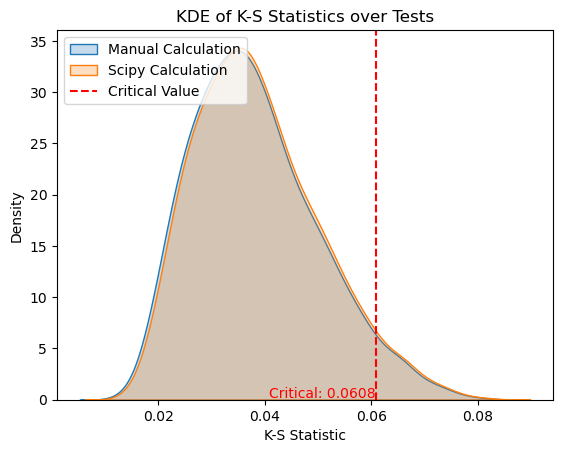

In [14]:
# Set the sample size
sample_size = 1000

# Set the number of tests
tests = 1000

# Create a list to store the K-S statistics
ks_stats_manual = []

# Create a list to store the K-S statistics calculated by scipy
ks_stats_scipy = []

# Counter to keep track of tests with p-value <= 0.05
pvalue_counter = 0

# Perform KS two-sample test with critical values
def ks_test(sample_a, sample_b):
    ks_stat_sp, p_value = ks_2samp(sample_a, sample_b, method="exact")
    n1, n2 = len(sample_a), len(sample_b)
    critical = 1.36 * np.sqrt((n1 + n2) / (n1 * n2))
    return ks_stat_sp, p_value, critical

for i in range(tests):
    # Draw two samples from the population
    sample_a = random.sample(distribution, sample_size)
    sample_b = random.sample(distribution, sample_size)

    # Compute the CDF of sample_a
    sorted_a = np.sort(sample_a)
    cdf_a = np.arange(1, len(sorted_a) + 1) / float(len(sorted_a))

    # Compute the CDF of sample_b
    sorted_b = np.sort(sample_b)
    cdf_b = np.arange(1, len(sorted_b) + 1) / float(len(sorted_b))

    # Calculate the K-S statistic
    combined_sorted_samples = np.sort(np.concatenate((sorted_a, sorted_b)))
    cdf_a_interp = np.interp(combined_sorted_samples, sorted_a, cdf_a)
    cdf_b_interp = np.interp(combined_sorted_samples, sorted_b, cdf_b)
    ks_stat_manual = np.max(np.abs(cdf_a_interp - cdf_b_interp))

    # Store the K-S statistic
    ks_stats_manual.append(ks_stat_manual)

    # Calculate and store the K-S statistic using scipy
    ks_stat_sp, p_value, critical = ks_test(sample_a, sample_b)
    ks_stats_scipy.append(ks_stat_sp)

    # Determine if line should be highlighted in green
    if p_value <= 0.05:
        pvalue_counter += 1

# Calculate the proportion of tests with significant p_value
p_significant = pvalue_counter / tests

# Print summary
significant_prop = sum(ks > critical for ks in ks_stats_scipy) / tests
print("\nSummary:")
print(f"Proportion of tests with p-value <= 0.05: {p_significant}")
print(f"Proportion of tests where K-S statistic exceeds critical value: {significant_prop}")

# Plot the KDE of K-S statistics
sns.kdeplot(ks_stats_manual, fill=True, label='Manual Calculation')
sns.kdeplot(ks_stats_scipy, fill=True, label='Scipy Calculation')
plt.xlabel('K-S Statistic')
plt.ylabel('Density')
plt.title('KDE of K-S Statistics over Tests')

# Add vertical line at the critical value
plt.axvline(critical, color='red', linestyle='--', label='Critical Value')

# Add text for the critical value
plt.text(critical, 0.2, f'Critical: {critical:.4f}', color='red', ha='right')

plt.legend()
plt.show()

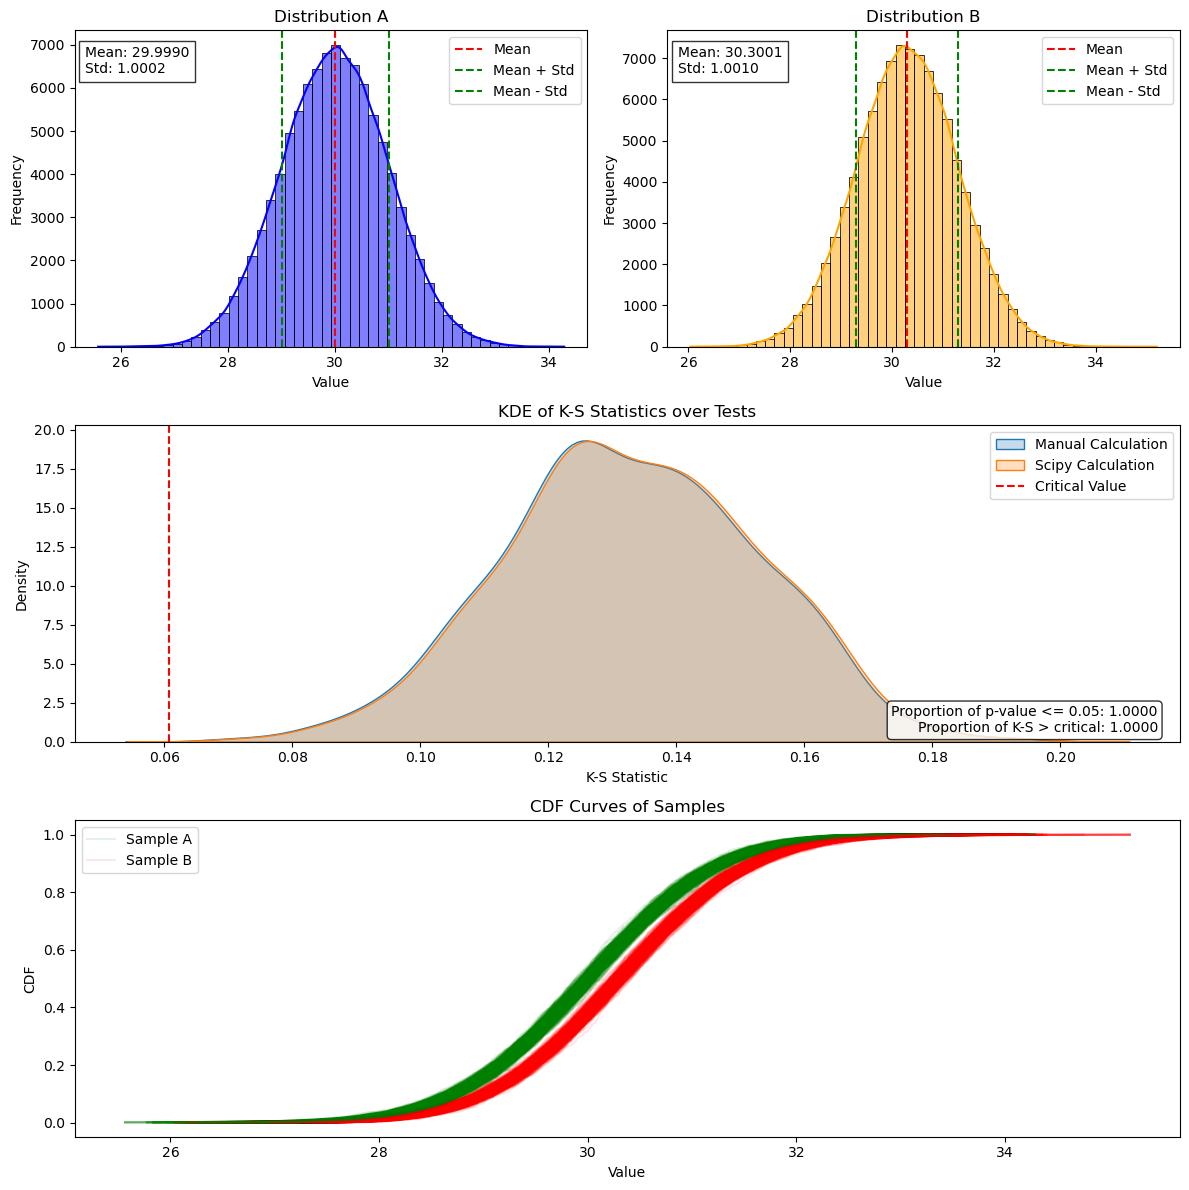

In [56]:
# Set the population size
population_size = 100000

# Set the sample size
sample_size = 1000

# Set the number of tests
tests = 1000

# Generate the Gaussian distributions
distribution_a = np.random.normal(loc=30, scale=1, size=population_size)
distribution_b = np.random.normal(loc=30.3, scale=1, size=population_size)

# Create a list to store the K-S statistics
ks_stats_manual = []

# Create a list to store the K-S statistics calculated by scipy
ks_stats_scipy = []

# Counter to keep track of tests with p-value <= 0.05
pvalue_counter = 0

# Perform KS two-sample test with critical values
def ks_test(sample_a, sample_b):
    ks_stat_sp, p_value = ks_2samp(sample_a, sample_b, method="exact")
    n1, n2 = len(sample_a), len(sample_b)
    critical = 1.36 * np.sqrt((n1 + n2) / (n1 * n2))
    return ks_stat_sp, p_value, critical

for i in range(tests):
    # Draw samples from the generated distributions
    sample_a = random.sample(list(distribution_a), sample_size)
    sample_b = random.sample(list(distribution_b), sample_size)

    # Compute the CDF of sample_a
    sorted_a = np.sort(sample_a)
    cdf_a = np.arange(1, len(sorted_a) + 1) / float(len(sorted_a))

    # Compute the CDF of sample_b
    sorted_b = np.sort(sample_b)
    cdf_b = np.arange(1, len(sorted_b) + 1) / float(len(sorted_b))

    # Calculate the K-S statistic
    combined_sorted_samples = np.sort(np.concatenate((sorted_a, sorted_b)))
    cdf_a_interp = np.interp(combined_sorted_samples, sorted_a, cdf_a)
    cdf_b_interp = np.interp(combined_sorted_samples, sorted_b, cdf_b)
    ks_stat_manual = np.max(np.abs(cdf_a_interp - cdf_b_interp))

    # Store the K-S statistic
    ks_stats_manual.append(ks_stat_manual)

    # Calculate and store the K-S statistic using scipy
    ks_stat_sp, p_value, critical = ks_test(sample_a, sample_b)
    ks_stats_scipy.append(ks_stat_sp)

    # Determine if line should be highlighted in green
    if p_value <= 0.05:
        pvalue_counter += 1

# Calculate the proportion of tests with significant p_value
p_significant = pvalue_counter / tests

# Print summary
significant_prop = sum(ks > critical for ks in ks_stats_scipy) / tests
summary_text = f"Proportion of p-value <= 0.05: {p_significant:.4f}\n" \
               f"Proportion of K-S > critical: {significant_prop:.4f}"

# Create a grid layout for the plots
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(3, 2)

# Plot histogram for Distribution A
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(distribution_a, bins=50, kde=True, color='blue', ax=ax1)
ax1.axvline(np.mean(distribution_a), color='red', linestyle='--', label='Mean')
ax1.axvline(np.mean(distribution_a) + np.std(distribution_a), color='green', linestyle='--', label='Mean + Std')
ax1.axvline(np.mean(distribution_a) - np.std(distribution_a), color='green', linestyle='--', label='Mean - Std')
ax1.text(0.02, 0.95, f"Mean: {np.mean(distribution_a):.4f}\nStd: {np.std(distribution_a):.4f}",
         transform=ax1.transAxes, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.8))
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution A')
ax1.legend()

# Plot histogram for Distribution B
ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(distribution_b, bins=50, kde=True, color='orange', ax=ax2)
ax2.axvline(np.mean(distribution_b), color='red', linestyle='--', label='Mean')
ax2.axvline(np.mean(distribution_b) + np.std(distribution_b), color='green', linestyle='--', label='Mean + Std')
ax2.axvline(np.mean(distribution_b) - np.std(distribution_b), color='green', linestyle='--', label='Mean - Std')
ax2.text(0.02, 0.95, f"Mean: {np.mean(distribution_b):.4f}\nStd: {np.std(distribution_b):.4f}",
         transform=ax2.transAxes, ha='left', va='top', bbox=dict(facecolor='white', alpha=0.8))
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution B')
ax2.legend()

# Plot the KDE of K-S statistics
ax3 = fig.add_subplot(gs[1, :])
sns.kdeplot(ks_stats_manual, fill=True, label='Manual Calculation', ax=ax3)
sns.kdeplot(ks_stats_scipy, fill=True, label='Scipy Calculation', ax=ax3)
ax3.set_xlabel('K-S Statistic')
ax3.set_ylabel('Density')
ax3.set_title('KDE of K-S Statistics over Tests')
ax3.axvline(critical, color='red', linestyle='--', label='Critical Value')
ax3.text(0.98, 0.02, summary_text, transform=ax3.transAxes, ha='right', va='bottom',
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))
ax3.legend()

# Plot the CDF curves of all samples
ax4 = fig.add_subplot(gs[2, :])
for i in range(tests):
    sample_a = random.sample(list(distribution_a), sample_size)
    sample_b = random.sample(list(distribution_b), sample_size)
    sorted_a = np.sort(sample_a)
    sorted_b = np.sort(sample_b)
    cdf_a = np.arange(1, len(sorted_a) + 1) / float(len(sorted_a))
    cdf_b = np.arange(1, len(sorted_b) + 1) / float(len(sorted_b))
    ax4.plot(sorted_a, cdf_a, color='green', alpha=0.1)
    ax4.plot(sorted_b, cdf_b, color='red', alpha=0.1)
ax4.set_xlabel('Value')
ax4.set_ylabel('CDF')
ax4.set_title('CDF Curves of Samples')
ax4.legend(['Sample A', 'Sample B'])

plt.tight_layout()
plt.show()
